# Part I: Theory Questions

## k-Nearest Neighbor Classification

### Question 1:

#### 1-NN

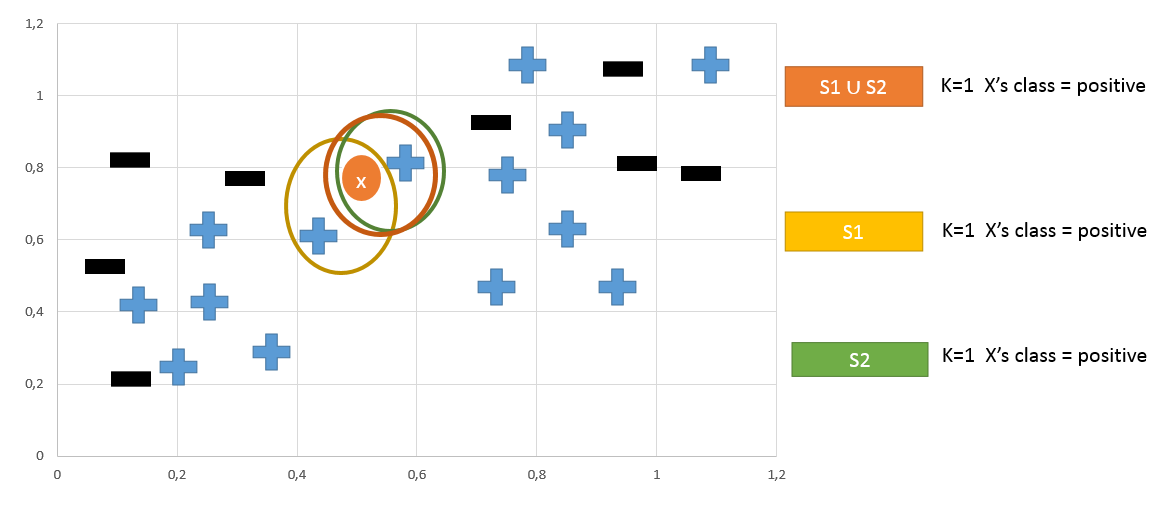

#### 3-NN

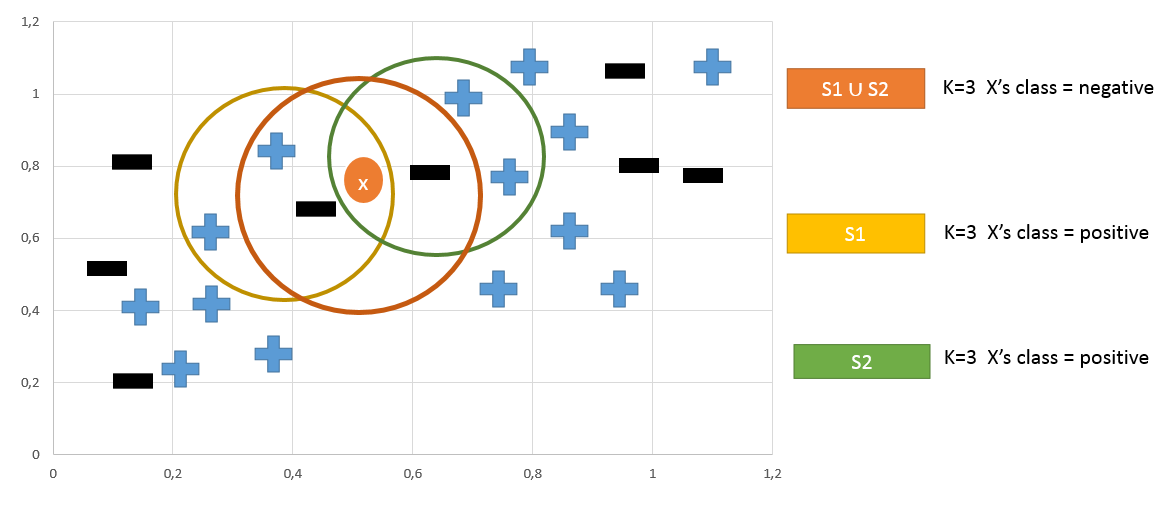

### Question 2:

#### Answer A:


Value of k=3 minimizes training set error for given data set.Because we applied k-cross-validation method and we use to one item for test data, it will be obvious that it will be difficult to decide without looking at minimum 3 data.But training set error not a reasonable for this value of k, beacuse the data set not enough for the cross validation method.

#### Answer B:

Value of k=1 minimizes leave-one-out cross-validation error for given data set. Because items in data set mostly included in the class of the nearest neighbor. Cross-validation a better measure of test set performance because the whole data set is trained multiple times with new values and averaging this errors.

#### Answer C:

Yes, too large values k be bad in this data set because already data set too small. This stuation not effective for knn algorithm, but for too small values k more effective for this data set.

## Lineer Regression


### Answer 1:

$ X \quad {shape}\quad 23 \times 6 \\
Y \quad {shape}\quad 23 \times 1 \\
\theta \quad {shape}\quad  6 \times 1 $

### Answer 2:


Gradient descent, since $(X^{T}X)^{-1}$ will be very slow to compute in the normal equation. Inverting such a large matrix is computationally expensive, so gradient descent is better.

# PART II: Book Recommendation System

##   INTRODUCTIONS


Recommendation systems have an important place in our day.Many e-commerce and retail companies are leveraging the power of data and boosting sales by implementing recommender systems on their websites. These systems aim to predict users’ interests and recommend items that quite likely are interesting for them. Data required for recommender systems stems from explicit user ratings after watching a movie or listening to a song, from implicit search engine queries and purchase histories, or from other knowledge about the users/items themselves.

Various machine learning applications are used when making these propositions. One of these collaborative filtering based systems.These kinds of systems utilize user interactions to filter for items of interest.  An interesting way of looking at collaborative filtering is to think of it as a generalization of classification and regression. While in these cases we aim to predict a variable that directly depends on other features, in collaborative filtering there is no such distinction of feature variables and class variables.

Various algorithms can be used in such systems.The KNN algorithm is one of them.The logic of this algorithm is to take advantage of the data that is most similar to itself when rating.

In this assignment, we aimed to write a rating prediction application using KNN and W-KNN algorithms with various similarity functions.

### Dataset

Book-Crossings is a book rating dataset compiled by Cai-Nicolas Ziegler . As mentioned
before, it contains 1.1 million ratings of 270,000 books by 90,000 users. The
ratings are on a scale from 0 to 10.

    • The data consists of three tables: ratings, books info, and users info.
    • The ratings data set provides a list of ratings that users have given to books. It
      includes 1,149,780 records and 3 fields: userID, ISBN, and bookRating.
    • The books dataset provides book details. It includes 271,360 records and 8 fields:
      ISBN, book title, book author, publisher and so on.
    • The user dataset provides the user demographic information. It includes 278,858
      records and 3 fields: user id, location, and age.


The data we will use on this data are three;

    • User-ID's   : Only include us and canada users.
    • ISBN        : Contains books only in amazon.
    • bookRatings : Books in the Amazon include ratings given by users of USA and Canada
    

When using this filter, we passed the csv files to a dataframe, and then we were able to merge them with each other. After applying this filtering we have a 3-column and 66991-row  dataframe.


### Functions & Data types

#### DfToDict() 

This function takes dataframe as parameter and returns two two-dimensional dictionary.

First dictionary format :

    { UserIDs : { User ISBNs : Ratings}} 
   
Second dictionary format :
    
    { ISBNs : { Users vote this ISBN : Ratings}} 


#### Prediction()

This function contains main algorithm of this assignment and takes six parameter. These parameters;

        1.TrainDict # type {trainuserid:{isbn:rating}}
        2.TestDict # type {testuserid:{isbn:{rating}}
        3.TrainISBNDict # type {isbn:{trainuserid:rating}}
        4.neighbourNumber # K for KNN
        5.smilarityName # name of similarity function to be used
        6.predictDict # dictionary used to check predictions
        
In this function nearest neighbours are determined for all users with selected smilarity function first. Then through using of nearest neighbour algorithm the rating prediction will be made for every single book of each user. After these predictions, calculate mean absolute error with using these predictions. Two different KNN are used in this algorithm. One of them standart KNN algorithm, other one is Weighted KNN algorithm. Finally function returns two value. This values are mean absolute error and weighted mean absolute error.

Mean Absolute error calculated as given below :

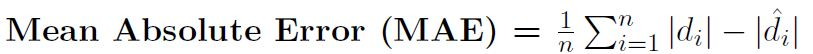

#### cosineSim()

This function calculate smilarites for given users and takes four parameter.These are;

    1.TestUserDict # type {isbn:rating}
    2.TrainUserDict # type {trainuserid:{isbn:{rating}}
    3.TrainBookDict # type {isbn:{trainuserid:{rating}}
    4.TrainSquaresDict # type {trainuserid: root of sum of squares ratings}
    
In this function users accept as vector and calculate cosine smilarities as given formula below.

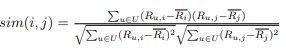

After calculated smilarities, function returns smilarity list for KNN algorithm. Because smilarities determine neighbour.

This smilarity is suitable for Used-based collaborative filtering.

In [1]:
import numpy as np

testuser={"exampleisbn":6}
          
trainuser = {1235:{"exampleisbn":10,"exampleisbn2":4},
            1245:{"exampleisbn":4,"exampleisbn3":2}}
          
trainbook= {"exampleisbn":{1235:10,1245:4},
            "exampleisbn2":{1235:4},
            "exampleisbn3":{1245:4}
           }
trainsquares={1235:10.77,
              1245:4.47}

def cosineSim(TestData,TrainUserData,TrainBookData,TrainSquares):
    
    cossim=list() #smilarity list of testuser
    setuser=set() # intersection trainUser set
    vecttest=0 # sum of squares ratings
    for x,y in TestData.items():
        vecttest += y**2 
        if x in TrainBookData:
            setuser |= set(TrainBookData[x].keys())
            
    vecttest=vecttest**0.5 # root of sum of squares testuser ratings
    for a in setuser:
        dotproduct =0 # sum of common items ratings dots 
        for key,value in TestData.items():
            if key in TrainUserData[a]:
                dotproduct+= value * TrainUserData[a][key] # common item ratings dot
        vecttrain=TrainSquares[a] # root of sum of squares trainuser ratings
        if ( vecttrain !=0) & (vecttest !=0) :
            cossim.append([dotproduct/(vecttrain*vecttest),TrainUserData[a],TestData])#calculate smilarity and append list
        else:
            cossim.append([0,TrainUserData[a],TestData])
    cossim =sorted(cossim,key=lambda l:l[0], reverse=True)
    return cossim
testcosine=cosineSim(testuser,trainuser,trainbook,trainsquares)
print("cosine smilarity list of testuser :\n",
      np.array(testcosine))

cosine smilarity list of testuser :
 [[0.9285051067780872 {'exampleisbn': 10, 'exampleisbn2': 4}
  {'exampleisbn': 6}]
 [0.8948545861297539 {'exampleisbn': 4, 'exampleisbn3': 2}
  {'exampleisbn': 6}]]


#### adjCosineSim()

This function calculate smilarites for given users and takes three parameter.These are;

    1.TestUserDict # type {isbn:rating}
    2.TrainUserDict # type {trainuserid:{isbn:{rating}}
    3.TrainBookDict # type {isbn:{trainuserid:{rating}}
    
In this function users accept as vector and calculate adj-cosine smilarities as given formula below.

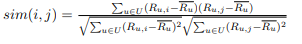

After calculated smilarities, function returns smilarity list for KNN algorithm. Because smilarities determine neighbour same as cosineSim function.

This smilarity is suitable for Used-based collaborative filtering too.

In [2]:
def adjCosineSim(TestData,TrainUserData,TrainBookData):
    
    adjcossim=list() #smilarity list of testuser
    setuser=set() #intersection trainUser set
    meantest=sum(TestData.values())/len(TestData) # testuser ratings mean
    
    for x,y in TestData.items():
        if x in TrainBookData:
            setuser |= set(TrainBookData[x].keys())
            
  
    for a in setuser:
        vecttrain=0 # sum of substract common items ratings and trainuser mean
        vecttest=0 # sum of substract common items ratings and testuser mean
        dotproduct =0 # sum of common item rating dots
        meantrain = sum(TrainUserData[a].values())/len(TrainUserData[a])
        for key,value in TestData.items():
            if key in TrainUserData[a]:
               vect1= (value-meantest)
               vect2=(TrainUserData[a][key]-meantrain)
               dotproduct += vect1 *vect2
               vecttest += vect1**2
               vecttrain+= vect2**2
               
        vecttest=vecttest**0.5 # root of sum of squares testuser ratings
        vecttrain=vecttrain**0.5 # root of sum of squares trainuser ratings
        if ( vecttrain !=0) & (vecttest !=0) :
            adjcossim.append([dotproduct/(vecttrain*vecttest),TrainUserData[a],TestData])#calculate smilarity and append list
        else:
            adjcossim.append([0,TrainUserData[a],TestData])
    adjcossim =sorted(adjcossim,key=lambda l:l[0], reverse=True)
    return adjcossim
testadjcos=adjCosineSim(testuser,trainuser,trainbook)
print("adj-cosine smilarity list of testuser :\n",
      np.array(testadjcos))

adj-cosine smilarity list of testuser :
 [[0 {'exampleisbn': 10, 'exampleisbn2': 4} {'exampleisbn': 6}]
 [0 {'exampleisbn': 4, 'exampleisbn3': 2} {'exampleisbn': 6}]]


Becomes smilarities 0 because adj-cosine formula use (item rating- usermean). given examples testuser has got one item and dot product becomes 0.

#### correlation()

This function calculate smilarites for given users and takes three parameter.These are;

    1.TestUserDict # type {isbn:rating}
    2.TrainUserDict # type {trainuserid:{isbn:{rating}}
    3.TrainBookDict # type {isbn:{trainuserid:{rating}}
    
In this function users accept as vector and calculate adj-cosine smilarities as given formula below.

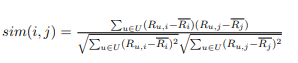

After calculated smilarities, function returns smilarity list for KNN algorithm. Because smilarities determine neighbour same as cosineSim and adjcosinesim function.

In [3]:
def correlation(TestData,TrainUserData,TrainBookData):
    
    correlation=list() # smilarity list for testuser
    meanitem={} # item means in training data dictionry 
    setuser=set() # intersection trainUser set
    
    for x,y in TestData.items():
        if x in TrainBookData:
            setuser |= set(TrainBookData[x].keys())
            mean=sum(TrainBookData[x].values())/len(TrainBookData[x])
            meanitem.update({x:mean}) # item means updated here
        else:
            meanitem.update({x:0})
            
    for a in setuser:
        vectx =0 #  sum of substract common items ratings and trainusers common itemmean
        vecty=0 # sum of substract common items ratings and trainusers common itemmean
        dotproduct =0
        for key,value in TestData.items():
            if key in TrainUserData[a] :
                vect1= (value-meanitem[key])
                vect2=(TrainUserData[a][key]-meanitem[key])
                dotproduct += vect1 *vect2
                vectx += vect1**2
                vecty+= vect2**2
        vectx=vectx**0.5 # root of sum of squares testuser ratings
        vecty=vecty**0.5 # root of sum of squares trainuser ratings
        if (vectx !=0) & (vecty !=0) :
            correlation.append([dotproduct/(vecty*vectx),TrainUserData[a],TestData])#calculate smilarity and append list
        else:
            correlation.append([0,TrainUserData[a],TestData])
            
    correlation =sorted(correlation,key=lambda l:l[0], reverse=True)
    return correlation
testcorrelation=correlation(testuser,trainuser,trainbook)
print("correlation smilarity list of testuser :\n",
      np.array(testcorrelation))

correlation smilarity list of testuser :
 [[1.0 {'exampleisbn': 4, 'exampleisbn3': 2} {'exampleisbn': 6}]
 [-1.0 {'exampleisbn': 10, 'exampleisbn2': 4} {'exampleisbn': 6}]]


When the calculate correlation smilarity dot product calculated with common items and this items means in train data.I think this is for Item-based collaborative filtering.Not suitable for Used-based collaborative filtering.

#### squareforcos()

This function is only used to help cossime and increase the algorithm run time.
Take one paramater as type :

        trainData # {userid:{isbn:rating}}
        
Function calculate sum of ratings square for each user and return dict as type:

    {userid : sumofratingsquares}
        


In [4]:
def squareforcos(TrainUsers):
    
    squareddict={}
    for key,value in TrainUsers.items():
        vecttrain = np.array(list(value.values()))
        vecttrain = np.sum(np.square(vecttrain))**0.5
        squareddict[key]=vecttrain
    
    
    return squareddict

print("example transform:\n",
      "input:",trainuser,
      "\n output:",squareforcos(trainuser))

example transform:
 input: {1235: {'exampleisbn': 10, 'exampleisbn2': 4}, 1245: {'exampleisbn': 4, 'exampleisbn3': 2}} 
 output: {1235: 10.770329614269007, 1245: 4.47213595499958}


### KNN Algorithm

In [5]:
import numpy as np

def Knn(CosSim_BooksNumpy,number_K,trainBook,predictdict):
    Numpylen =  len(CosSim_BooksNumpy)
    if Numpylen < number_K: # controlling list length for loop
        number_K = Numpylen 
    
    Keylist=CosSim_BooksNumpy[0][2].keys() # testuser isbn list
    IsbnList=[]# isbns data 
    meanisbn=0
    for k in Keylist: 
        IsbnList.append([k,0,0,0,0,0])# ["isbn","neighbours mean","real rating of testuser","weighted mean","neighbours weight sum","neighbours lengt"]
    for i in range(number_K):
        item = CosSim_BooksNumpy[i][1].keys()
        meanisbn=0 #testuser mean 
        for isbninlist in IsbnList:
            isbninlist[2]= CosSim_BooksNumpy[i][2][isbninlist[0]] # real item rating uploaded
            meanisbn += isbninlist[2] # add item rating for user mean
            if isbninlist[0] in item:
                
                trainmean = sum(CosSim_BooksNumpy[i][1].values())/len(CosSim_BooksNumpy[i][1]) # trainUser mean calculating
    
                isbninlist[1]+=CosSim_BooksNumpy[i][1][isbninlist[0]]-trainmean # neighbour trainusers deviation for this item
                
                isbninlist[3]+=((1/(1.1-CosSim_BooksNumpy[i][0]))**2)*(CosSim_BooksNumpy[i][1][isbninlist[0]]-trainmean)#weighted trainusers deviation for this item
                
                isbninlist[5] += 1 # how many users rate this book count decreasing
                
                isbninlist[4] += (1/(1.1-CosSim_BooksNumpy[i][0]))**2# neighbours distance for total weight 
                    
    MeanAbsolute=0 
    WeightedMeanAbsolute=0
    meanisbn = meanisbn/len(IsbnList) # testuser mean
   
    for isbninlist in IsbnList:
        if isbninlist[5]!=0: # if at least one neighbour rate this book
            isbninlist[1] = round(meanisbn + (isbninlist[1] / isbninlist[5])) # calculate predict value
            
            if isbninlist[1] <0: # predict range will be 0 to 10
                isbninlist[1]=0
            if isbninlist[1]>10: # predict range will be 0 to 10
                isbninlist[1]=10
        
        else: 
            isbninlist[1] = round(meanisbn)# anybody dont rate update predict userMean
            
        if isbninlist[4]!=0: #if at least one neighbour rate this book
            
            isbninlist[3] = round(meanisbn+ (isbninlist[3] / isbninlist[4])) # calculate predict value
            if isbninlist[3] <0: # predict range will be 0 to 10
                isbninlist[3]=0
            if isbninlist[3]>10: # predict range will be 0 to 10
                isbninlist[3]=10
            
        else:
            isbninlist[3] = round(meanisbn) # anybody dont rate this item, update predict userMean
        
        predictdict[isbninlist[0]][1],predictdict[isbninlist[0]][2]=isbninlist[1],isbninlist[3]# update prediction dict
        WeightedMeanAbsolute += abs(isbninlist[3]-isbninlist[2]) # calculating user MAE
        MeanAbsolute += abs(isbninlist[1]-isbninlist[2]) # calculating weighted User MAE
    
    MeanAbsolute=MeanAbsolute/len(IsbnList) # calculating user MAE
    WeightedMeanAbsolute=WeightedMeanAbsolute/len(IsbnList) # calculating weighted User MAE
    IsbnList=np.array(IsbnList)
    
    return MeanAbsolute,WeightedMeanAbsolute,len(IsbnList)


This function takes four parameter. These parameters;

    1.CosSim_BooksNumpy # type [[smilarity,{trainuserisbn: trainuserrate},{testuserisbn: testuserrating}] 3-dimensional array
    2.number_K # K for KNN
    3.TrainBook # type {isbn:{trainuserid:rating}}
    4.predictDict # dictionary used to check predictions

#### About K-NN and WK-NN

Let's first start by establishing some definitions and notations. We will use x to denote a feature (aka. predictor, attribute) and y to denote the target (aka. label, class) we are trying to predict.

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

Given a positive integer K my KNN algorithm performs the following two steps:

First convert smilarities to distance for weighted prediction. I used this transfer function given below:

$$   d = \frac{1}{1.1-Smilarity}$$

Secondly predictions are computed as weighted and non-weighted average of deviations from neighbour's mean and adding it to active user's mean rating. Deviations are used to adjust for the user associated biases. User biases occur as certain users may tend to always give high or low ratings to all items.

$ x = TestUser $

$ y = TrainUser $

$ i = TestUser items$

$ k = neighbour  $

$ d= distance $



Non-Weighted Formula:
$$ P_i = \overline{x} + \frac{{\underset{n \epsilon K}{{\displaystyle\sum}}}(y_{n,i} - \overline{y_n})}{k}$$



Weighted Formula
$$ wP_i = \overline{x} + \frac{{\underset{n \epsilon K}{{\displaystyle\sum}}}(y_{n,i} - \overline{y_n})*d(x,y)}{{\underset{n \epsilon K}{{\displaystyle\sum}}}d(x,y)}$$


Thanks to this approach, I can make more successful predictions and get fewer errors. I tried to implement my code by thinking that it would be more logical for User-based CF to evaluate personal behaviors.

## Cross Validation

In this part splitting the training data into ten pieces and providing the test-train error control for each piece.

I save the error values obtained for each k value.

I repeated the cross-validation test for one to fifty k values.

I repeated this process by using weighted-knn and unweighted-knn for all smilarity functions.

I saved the result of these calculations in a graph as below:


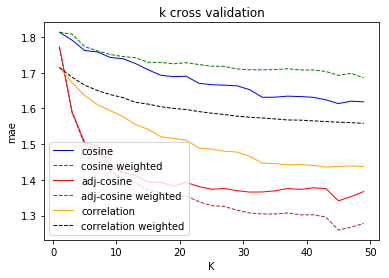

I have found that the minimum error margin has been reached when the algorithm works with the Adjusted-Cosine similarity function.

I've found that it works for k = 45 with the lowest error when working with adjusted cosine.



# TestData

I tried for given test data.The results are;

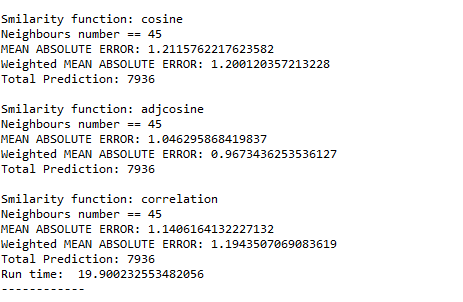

##                          $$\\Muhammed\,Enes\\KOÇAK\\21427119$$